In [ ]:

! git clone https://github.com/zhouchunpong/GCN_Keras.git

Cloning into 'GCN_Keras'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 65 (delta 3), reused 0 (delta 0), pack-reused 59
Unpacking objects: 100% (65/65), done.


In [ ]:
!pip install -r GCN_Keras/requirements.txt
!pip install lifelines
!pip install shap
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 25.2 MB 1.6 MB/s 
     |████████████████████████████████| 312 kB 52.8 MB/s 
     |████████████████████████████████| 17.3 MB 45.4 MB/s 
     |████████████████████████████████| 1.6 MB 38.4 MB/s 
     |████████████████████████████████| 377.1 MB 6.8 kB/s 
     |████████████████████████████████| 6.7 MB 43.0 MB/s 
     |████████████████████████████████| 109.3 MB 45 kB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
     |████████████████████████████████| 3.1 MB 53.0 MB/s 
     |████████████████████████████████| 488 kB 47.4 MB/s 
  Created wheel for networkx: filename=networkx-2.1-py2.py3-none-any.whl size=1447361 sha256=03a0829f25ca1d340caf9dfb5a1c95c3e5b96e37af0d8713b605bd42a638488e
  Stored in directory: /root/.cache/pip/wheels/48/b1/c4/94ca0cdd84961331402e857d562d9822ccfcb0567c3d064bf2
Successfully built networkx
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully u

     |████████████████████████████████| 349 kB 26.7 MB/s 
     |████████████████████████████████| 68 kB 6.7 MB/s 
     |████████████████████████████████| 38.1 MB 7.0 MB/s 
     |████████████████████████████████| 15.7 MB 3.1 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=e2d50d7b4bcfbc7280a5868bd2140e9ccddb2d00575c43da5dcfcafab4e8b2a8
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

     |████████████████████████████████| 564 kB 22.1 MB/s 
     |████████████████████████████████| 2.9 MB 23.0 MB/s 
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.21.2 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 wh

In [ ]:

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from numpy import array
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#data_t = pd.read_csv('../MRS_traindata_AIIMS_new2.csv')
data_up =  pd.read_csv('/content/AIIMS_CAdata_groups.csv')
data_up = np.array(data_up)


albumin = data_up[0 :, 3].astype(float)
b2m = data_up[0:, 4].astype(float)
#b2m = b2m * 10
Hb = data_up[0:, 7].astype(float)
calcium = data_up[0:, 9].astype(float)
egfr = data_up[0:, 23].astype(float)

age = data_up[0:, 1].astype(int)
del17 = data_up[0:,32].astype(int)

#feature_matrix=np.stack((age, albumin,b2m,calcium,egfr,Hb), axis = 1)
feature_matrix=np.stack((b2m, age, albumin, calcium, Hb, egfr, del17), axis = 1)

print(feature_matrix.shape)

os = data_up[0:,17].astype(float)
os_event = data_up[0:, 16].astype(int)
pfs = data_up[0:, 13].astype(float)
pfs_event =  data_up[0:, 12].astype(int)

(384, 7)


In [ ]:



lab_temp = pd.read_csv('/content/trainCAdata_labels_consensus_AIIMS.csv',header=None)

lab = []
for i in range(len(lab_temp)):
    lab.append(int(lab_temp.iat[i,0]))
print("\nList after Addition of elements from 1-3: ")
print(lab)

print(lab.count(2), lab.count(1), lab.count(0))


#classes = set(lab)
#classes_dict = {c: np.identity(len(classes))[i, :] for i, c in enumerate(classes)}
#labels_onehot = np.array(list(map(classes_dict.get, lab)), dtype=np.int32)
#len(labels_onehot)
#y=labels_onehot
y = np.array(lab)
print(lab)
print(y)



List after Addition of elements from 1-3: 
[0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0

In [ ]:
feature_matrix.shape, y.shape

((384, 7), (384,))

In [ ]:
X = feature_matrix

In [ ]:
%cd /content/GCN_Keras/

/content/GCN_Keras


In [ ]:
from __future__ import print_function

import keras
from keras.layers import Input, Dense, Dropout, GaussianNoise
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint


from graph import GraphConvolution
from utils import *
import scipy
import seaborn as sns

import CRSS_AIIMS_functions as cf


Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='

In [ ]:
def get_adjs(b2m, age, albumin, calcium, Hb, egfr, del17,os, pfs, os_event, pfs_event):
    
    adj1 = np.array(cf.adjacency_matrix1(b2m, age, albumin, calcium, Hb, egfr, del17)).astype(float)
    adj2 = np.array(cf.adjacency_matrix2(b2m, age, albumin, calcium, Hb, egfr, del17, os, pfs, os_event, pfs_event)).astype(float)
    adj3 = np.array(cf.adjacency_matrix3(b2m, age, albumin, calcium, Hb, egfr, del17)).astype(float)
    
    return adj1, adj2, adj3

In [ ]:
# Define parameters
FILTER = 'localpool'  # 'localpool' or 'chebyshev'
MAX_DEGREE = 2  # maximum polynomial degree
SYM_NORM = True  # symmetric (True) vs. left-only (False) normalization
NB_EPOCH = 200
PATIENCE = 50  # early stopping patience

In [ ]:
# Get data
# X:features  A:graph  y:labels
#X, A, y = load_data(dataset='cora', use_feature=True)
#y_train, y_val, y_test, train_mask, val_mask, test_mask = get_splits(y)

# Normalize X
X /= X.sum(1).reshape(-1, 1)
#A[A > 0.] = 1.

# t = np.mean(A) - np.std(A)
# A[A < t] = 0.0

(384, 384)


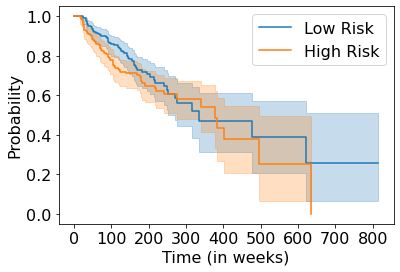

0.18606535504170316


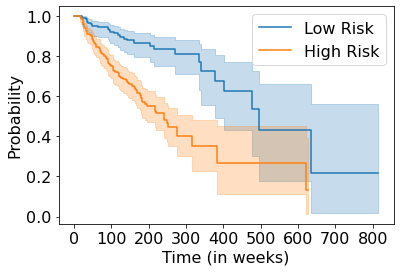

7.350076132298336e-09


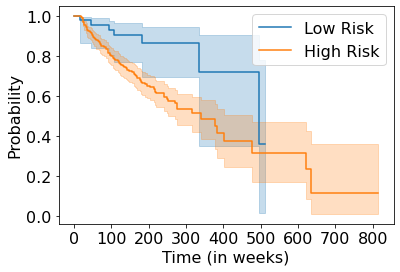

0.006943730384707858


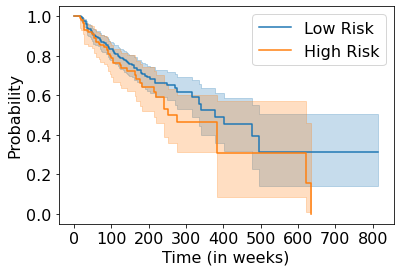

0.14270741807094062


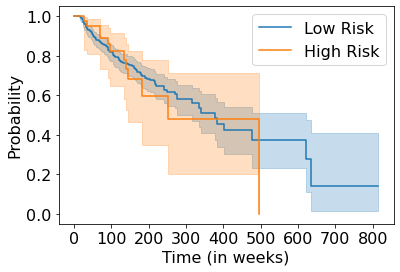

0.6440867994105728


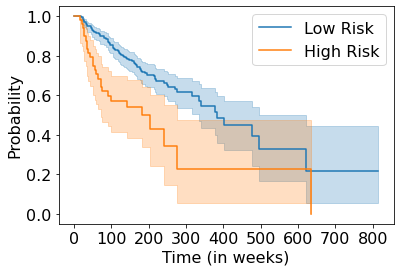

2.9171318567341112e-05


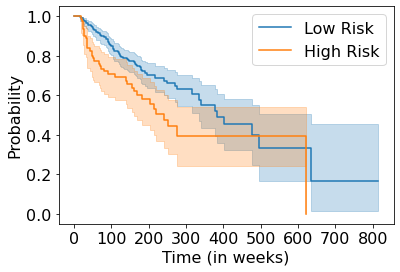

0.0009221019377070573


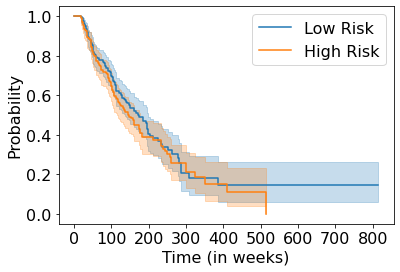

0.3634399896518178


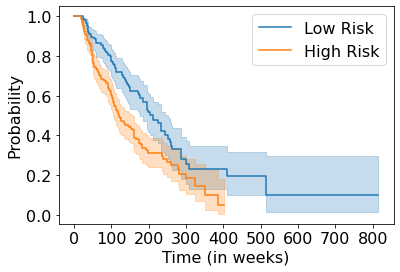

0.0001309136591891492


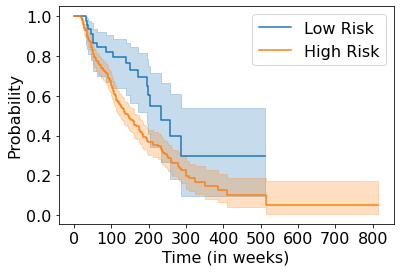

0.007145986294444671


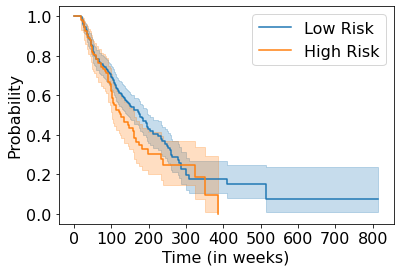

0.10529005367573996


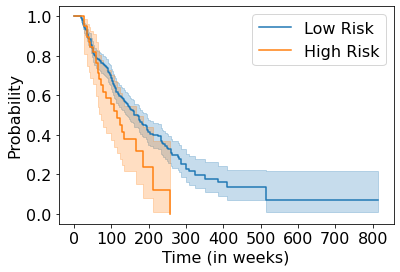

0.023236309524362654


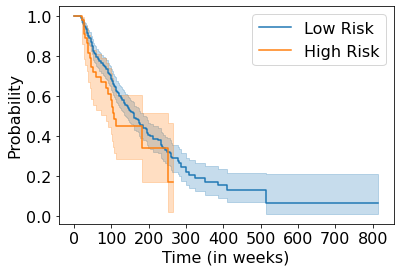

0.1735168486561936


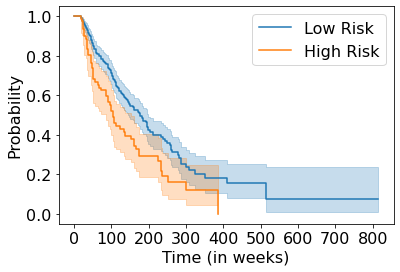

0.0007727616932011395
[5.37445566e+00 1.36053013e+08 1.44014808e+02 9.49757328e+00
 4.30360940e+01 3.42802468e+04 1.29406000e+03]


In [ ]:
A1, A2, A3 = get_adjs(b2m, age, albumin, calcium, Hb, egfr, del17,os, pfs, os_event, pfs_event)

A1 = A1 + -1*np.min(A1)

#A1[ A1 < 0.] = 0.

A1=scipy.sparse.csr_matrix(A1)
A2=scipy.sparse.csr_matrix(A2)
A3=scipy.sparse.csr_matrix(A3)

A1 = preprocess_adj(A1, SYM_NORM)
A2 = preprocess_adj(A2, SYM_NORM)
A3 = preprocess_adj(A3, SYM_NORM)





In [ ]:
alpha = 0.7
A_ = A1*alpha + A2*(alpha**2) + A3*(alpha**3)

In [ ]:
support = 1
graph = [X, A_]

In [ ]:
# Define model architecture
# NOTE: We pass arguments for graph convolutional layers as a list of tensors.
G = [Input(shape=(None,))]
X_in = Input(shape=(X.shape[1],))

H = GraphConvolution(16, support, activation='relu')([X_in]+G)
#H = Dropout(rate=0.1)(H)
Y = Dense(3, activation='softmax', bias=True)(H)

In [ ]:
np.bincount(y)

array([198, 132,  54])

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
compute_class_weight("balanced",[0,1,2], y)

array([0.64646465, 0.96969697, 2.37037037])

In [ ]:
# Callbacks for EarlyStopping
#es_callback = EarlyStopping(monitor='weighted_acc', patience=200)
#class_weights = { 0 : 1.21 , 1 : 0.76, 2 : 1.18}
class_weights = { 0 : 0.64 , 1 : 0.96, 2 : 2.37}

In [ ]:
# Compile model
model = Model(inputs=[X_in]+G, outputs=Y)
model.load_weights('/content/best_model_16unit_3000epochs_weights.h5')
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.01, beta_1=0.2), metrics=['acc'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 7)            0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
graph_convolution_2 (GraphConvo (None, 16)           128         input_4[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 3)            51          graph_convolution_2[0][0]        
Total para

In [ ]:
def sample_mask(idx, l):
    mask = np.zeros(l)
    mask[idx] = 1
    return np.array(mask, dtype=np.bool)

idx_train = range(307)
idx_val = range(307,384)
    
y_train = np.zeros(y.shape, dtype=np.int32) #y:label
y_val = np.zeros(y.shape, dtype=np.int32)

y_train[idx_train] = y[idx_train]
y_val[idx_val] = y[idx_val]

train_mask = sample_mask(idx_train, y.shape[0])
val_mask = sample_mask(idx_val, y.shape[0])

In [ ]:
# Train
#validation_data = (graph, y_val, val_mask)
history2 = model.fit(graph, y, #sample_weight=train_mask,
          batch_size=A1.shape[0],
          class_weight = class_weights, 
          epochs=6000,
          verbose=1,
          #validation_data=validation_data,
          shuffle=False,
          #callbacks=[es_callback]
          )

# run this cell 3 times for exact results.

Streaming output truncated to the last 5000 lines.
Epoch 3501/6000
384/384 [==============================] - 0s 24us/step - loss: 0.1222 - acc: 0.9661
Epoch 3502/6000
384/384 [==============================] - 0s 27us/step - loss: 0.1258 - acc: 0.8776
Epoch 3503/6000
384/384 [==============================] - 0s 26us/step - loss: 0.1222 - acc: 0.9661
Epoch 3504/6000
384/384 [==============================] - 0s 24us/step - loss: 0.1258 - acc: 0.8776
Epoch 3505/6000
384/384 [==============================] - 0s 23us/step - loss: 0.1222 - acc: 0.9661
Epoch 3506/6000
384/384 [==============================] - 0s 43us/step - loss: 0.1258 - acc: 0.8776
Epoch 3507/6000
384/384 [==============================] - 0s 46us/step - loss: 0.1223 - acc: 0.9661
Epoch 3508/6000
384/384 [==============================] - 0s 23us/step - loss: 0.1261 - acc: 0.8776
Epoch 3509/6000
384/384 [==============================] - 0s 29us/step - loss: 0.1223 - acc: 0.9661
Epoch 3510/6000
384/384 [===============

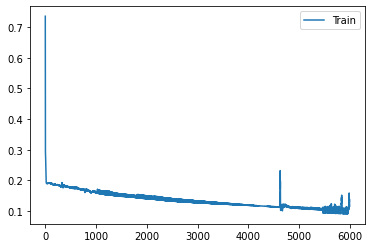

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label='Train')
#plt.plot(history.history['val_loss'], label='Val')
plt.legend()
plt.show()

In [ ]:
 arr =  np.array(history.history['loss'].copy ())
 arr[-2000:][np.where(arr[-2000:] > 0.12)] = 0.09
 arr2 =  np.array(history.history['val_loss'].copy ())
 arr2[-2000:][np.where(arr2[-2000:] > 0.12)] = 0.09


In [ ]:
 arr3 =  np.array(history2.history['loss'].copy ())
 arr3[-2000:][np.where(arr3[-2000:] > 0.12)] = 0.09

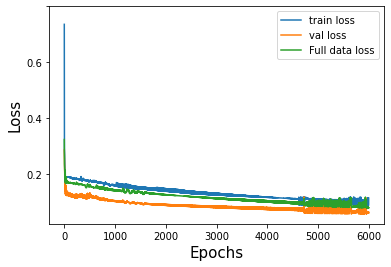

In [ ]:
import matplotlib.pyplot as plt
plt.plot(arr3, label='train loss')
plt.plot(arr2, label='val loss')
plt.plot(arr, label='Full data loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.yticks([i*2/10 for i in range(1,5)])
ax = plt.axes()
plt.setp(ax.get_yticklabels()[-1], visible=False)
plt.legend()
plt.savefig('aiims_train_finetune_loss.pdf', format='pdf', dpi=600, facecolor='white', bbox_inches='tight')

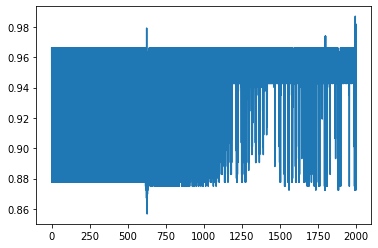

In [ ]:
plt.plot(history.history['acc'])

In [ ]:
model.load_weights('/content/aiims_best_model_16_units_mmrfpretrained_6000epochs.h5')

#model.load_weights('/content/best_model_16unit_2000epochs_weights.h5')

In [ ]:
# Evaluate model on the test data
eval_results = model.evaluate(graph,y,
                              batch_size=A1.shape[0])
print('Test Done.\n'
      'Test loss: {}\n'
      'Test accuracy: {}'.format(*eval_results))

384/384 [==============================] - 0s 187us/step
Test Done.
Test loss: 0.08792242407798767
Test accuracy: 0.9869791865348816


In [ ]:
# Evaluate model on the test data
eval_results = model.evaluate(graph,y,
                              batch_size=A1.shape[0])
print('Test Done.\n'
      'Test loss: {}\n'
      'Test accuracy: {}'.format(*eval_results))

384/384 [==============================] - 0s 14us/step
Test Done.
Test loss: 0.08792242407798767
Test accuracy: 0.9869791865348816


In [ ]:
preds = model.predict(graph, batch_size=A1.shape[0])

lab_pred = list(np.argmax(preds,1))

57 132 195
495.0
276.0
1.0449926549764154e-07 GCRS 1-2
182.0
2.0933658484816002e-14 GCRS 2-3

 P value :  3.0218131619310797e-12


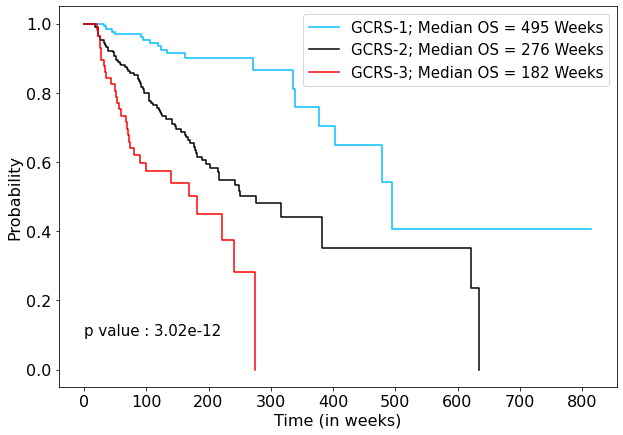

In [ ]:


print(lab_pred.count(2), lab_pred.count(1), lab_pred.count(0))
os_0 = []
os_1 = []
os_2 = []
os_ev_0 = []
os_ev_1 = []
os_ev_2 = []
plt.figure(figsize=(10,7))
for i in range(os_event.shape[0]):
       
    if lab_pred[i] == 0:
        os_0.append(os[i])
        os_ev_0.append(os_event[i])
    elif lab_pred[i] == 1:
        os_1.append(os[i])
        os_ev_1.append(os_event[i])
    else:
        os_2.append(os[i])
        os_ev_2.append(os_event[i])
        
kmf2 = KaplanMeierFitter()
kmf2.fit(os_1, os_ev_1, label='GCRS-1; Median OS = 495 Weeks')
print(kmf2._median)
a2 = kmf2.plot(ci_show=False, color='deepskyblue')
## fit the model for 2nd cohort
kmf2.fit(os_0, os_ev_0, label='GCRS-2; Median OS = 276 Weeks')
print(kmf2._median)
kmf2.plot(ax = a2,ci_show=False, color='k')
results = logrank_test(os_0, os_1, event_observed_A = os_ev_0, event_observed_B = os_ev_1)
# results.print_summary()
print(results.p_value, "GCRS 1-2") 

kmf2.fit(os_2, os_ev_2, label='GCRS-3; Median OS = 182 Weeks')
print(kmf2._median)
kmf2.plot(ax = a2, fontsize = 16,ci_show=False, color='r')
results = logrank_test(os_1, os_2, event_observed_A = os_ev_1, event_observed_B = os_ev_2)
# results.print_summary()
print(results.p_value, "GCRS 2-3") 
#results = logrank_test(os_0, os_2, event_observed_A = os_ev_0, event_observed_B = os_ev_2)
# results.print_summary()
#print(results.p_value, "inter high") 
a2.set_ylabel("Probability", fontsize = 16)
a2.set_xlabel("Time (in weeks)", fontsize = 16)
plt.legend(fontsize = 15)

from lifelines.statistics import multivariate_logrank_test
results = multivariate_logrank_test(os, lab_pred, os_event)
print("\n P value : ",results.p_value)

plt.text(0., 0.1, str('p value : '+'%.2e' % results.p_value), fontsize=15)
plt.savefig('/content/GCRS_aiims_os.pdf',format='pdf',dpi=600, bbox_inches='tight')
plt.show()
# c0 = 0
# c1 = 0
# c2 = 0
# for i in range(len(lab_pred)):
#     if lab[i] == 0 and os[i]/52 >= 3:
#         c0 += 1
#     if lab[i] == 1 and os[i]/52 >= 3:
#         c1 += 1
#     if lab[i] == 2 and os[i]/52 >= 3:
#         c2 += 1
# print(c0/len(os_0))
# print(c1/len(os_1))
# print(c2/ len(os_2))
# print(len(os_0))
# print(len(os_1))
# print(len(os_2))

PFS Analysis
212.0 **
148.0 **
0.0031730192674314667 GCRS 1-2
100.0 **
5.358271235687055e-09 GCRS 2-3

 P value :  5.998140447516794e-07


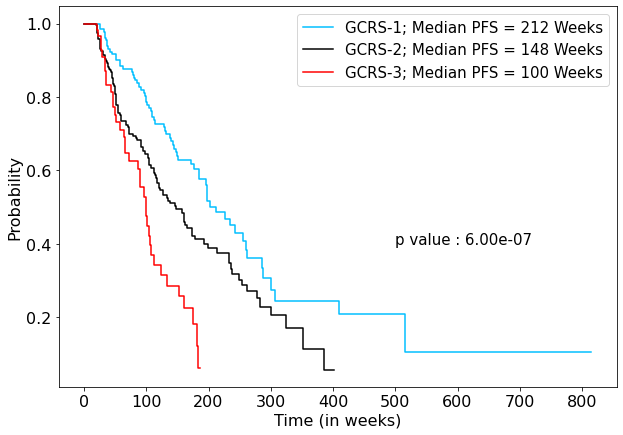

In [ ]:
##PFS anaylsis on training data for MRS
print("PFS Analysis")
pfs_0 = []
pfs_1 = []
pfs_2 = []
pfs_ev_0 = []
pfs_ev_1 = []
pfs_ev_2 = []
plt.figure(figsize=(10,7))
for i in range(pfs.shape[0]):    
    if lab_pred[i] == 0:
        pfs_0.append(pfs[i])
        pfs_ev_0.append(pfs_event[i])
    elif lab_pred[i] == 1:
        pfs_1.append(pfs[i])
        pfs_ev_1.append(pfs_event[i])
    else:
        pfs_2.append(pfs[i])
        pfs_ev_2.append(pfs_event[i])
        
        
kmf2 = KaplanMeierFitter()
## fit the model for 2nd cohort
kmf2.fit(pfs_1, pfs_ev_1, label='GCRS-1; Median PFS = 212 Weeks')
print(kmf2._median, "**")
a2 = kmf2.plot(ci_show=False, color='deepskyblue')


kmf2.fit(pfs_0, pfs_ev_0, label='GCRS-2; Median PFS = 148 Weeks')
print(kmf2._median, "**")
kmf2.plot(ax = a2, fontsize = 16,ci_show=False, color='k')

results = logrank_test(pfs_1, pfs_0, event_observed_A = pfs_ev_1, event_observed_B = pfs_ev_0)
# results.print_summary()
print(results.p_value, "GCRS 1-2") 

kmf2.fit(pfs_2, pfs_ev_2, label='GCRS-3; Median PFS = 100 Weeks')
print(kmf2._median, "**")
kmf2.plot(ax = a2,ci_show=False, color='r')

results = logrank_test(pfs_1, pfs_2, event_observed_A = pfs_ev_1, event_observed_B = pfs_ev_2)
# results.print_summary()
print(results.p_value, "GCRS 2-3") 

a2.set_ylabel("Probability", fontsize = 16)
a2.set_xlabel("Time (in weeks)", fontsize = 16)
plt.legend(fontsize = 15)

results = multivariate_logrank_test(pfs, lab_pred, pfs_event)
print("\n P value : ",results.p_value)

plt.text(500., 0.4, str('p value : '+'%.2e' % results.p_value), fontsize=15)

plt.savefig('/content/GCRS_aiims_pfs.pdf',format='pdf',dpi=600, bbox_inches='tight')
plt.show()


# CoxHazard Analysis

In [ ]:
len(lab_pred)


384

In [ ]:
lab = lab_pred

In [ ]:
print(lab.count(2), lab.count(1), lab.count(0))

57 132 195


In [ ]:
pd.get_dummies(lab)

,0,1,2
0,1,0,0
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
379,0,0,1
380,0,1,0
381,0,1,0
382,0,1,0


In [ ]:
gcrs1v0 = np.array(pd.get_dummies(lab))[:,0].reshape(-1,1)
gcrs2v0 = np.array(pd.get_dummies(lab))[:,2].reshape(-1,1)

In [ ]:
os = os.reshape(-1,1)
os_event = os_event.reshape(-1,1)
pfs = pfs.reshape(-1,1)
pfs_event = pfs_event.reshape(-1,1)
lab = np.array(lab).reshape(-1,1)

In [ ]:
gcrs1v0.shape, os.shape

((384, 1), (384, 1))

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
data_cox_os = pd.DataFrame(np.concatenate((os, os_event, gcrs1v0, gcrs2v0),axis=1))
data_cox_os.columns = ['OS', 'OS_event', 'gcrs1v0', 'gcrs2v0']
cph = CoxPHFitter()
cph.fit(data_cox_os, duration_col='OS', event_col='OS_event')
cph.print_summary(decimals=5) 

<lifelines.CoxPHFitter: fitted with 384 total observations, 261 right-censored observations>
             duration col = 'OS'
                event col = 'OS_event'
      baseline estimation = breslow
   number of observations = 384
number of events observed = 123
   partial log-likelihood = -617.28393
         time fit was run = 2022-01-10 08:15:38 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
gcrs1v0   1.31971    3.74235    0.26526          0.79982          1.83961              2.22514              6.29406
gcrs2v0   2.05336    7.79404    0.30936          1.44702          2.65970              4.25041             14.29205

                z      p   -log2(p)
covariate                          
gcrs1v0   4.97525 <5e-06   20.54942
gcrs2v0   6.63734 <5e-06   34.86585
---
Concordance = 0.67681
Partial AIC = 1238.56785
log-likelihood ratio test = 52.65730 on 2 df
-log2(p) of ll-ratio test = 37.98421

In [ ]:
data_cox_pfs = pd.DataFrame(np.concatenate((pfs,pfs_event, gcrs1v0, gcrs2v0),axis=1))
data_cox_pfs.columns = ['PFS', 'PFS_event', 'gcrs1v0', 'gcrs2v0']
cph = CoxPHFitter()
cph.fit(data_cox_pfs, duration_col='PFS', event_col='PFS_event')
cph.print_summary(decimals=5) 

<lifelines.CoxPHFitter: fitted with 384 total observations, 170 right-censored observations>
             duration col = 'PFS'
                event col = 'PFS_event'
      baseline estimation = breslow
   number of observations = 384
number of events observed = 214
   partial log-likelihood = -1087.15391
         time fit was run = 2022-01-10 08:15:38 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
gcrs1v0   0.46839    1.59741    0.15758          0.15954          0.77723              1.17298              2.17544
gcrs2v0   1.10149    3.00865    0.21270          0.68461          1.51837              1.98300              4.56478

                z       p   -log2(p)
covariate                           
gcrs1v0   2.97245 0.00295    8.40297
gcrs2v0   5.17865  <5e-06   22.09325
---
Concordance = 0.59505
Partial AIC = 2178.30783
log-likelihood ratio test = 25.65065 on 2 df
-log2(p) of ll-ratio test = 18.50303

In [ ]:
lab = pd.DataFrame(lab).replace([0,2],[2,3]).values

In [ ]:
data_cox_os = pd.DataFrame(np.concatenate((os, os_event, lab),axis=1))
data_cox_os.columns = ['OS', 'OS_event', 'gcrs']
cph = CoxPHFitter()
cph.fit(data_cox_os, duration_col='OS', event_col='OS_event')
cph.print_summary(decimals=5) 

<lifelines.CoxPHFitter: fitted with 384 total observations, 261 right-censored observations>
             duration col = 'OS'
                event col = 'OS_event'
      baseline estimation = breslow
   number of observations = 384
number of events observed = 123
   partial log-likelihood = -618.50228
         time fit was run = 2022-02-03 11:07:14 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
gcrs      0.99037    2.69223    0.14073          0.71455          1.26619              2.04327              3.54730

                z      p   -log2(p)
covariate                          
gcrs      7.03762 <5e-06   38.89561
---
Concordance = 0.67681
Partial AIC = 1239.00455
log-likelihood ratio test = 50.22060 on 1 df
-log2(p) of ll-ratio test = 39.40478

In [ ]:
data_cox_pfs = pd.DataFrame(np.concatenate((pfs,pfs_event, lab),axis=1))
data_cox_pfs.columns = ['PFS', 'PFS_event', 'gcrs']
cph = CoxPHFitter()
cph.fit(data_cox_pfs, duration_col='PFS', event_col='PFS_event')
cph.print_summary(decimals=5)

<lifelines.CoxPHFitter: fitted with 384 total observations, 170 right-censored observations>
             duration col = 'PFS'
                event col = 'PFS_event'
      baseline estimation = breslow
   number of observations = 384
number of events observed = 214
   partial log-likelihood = -1087.32349
         time fit was run = 2022-02-03 11:07:15 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
gcrs      0.53703    1.71091    0.10598          0.32931          0.74474              1.39002              2.10589

                z      p   -log2(p)
covariate                          
gcrs      5.06738 <5e-06   21.24152
---
Concordance = 0.59505
Partial AIC = 2176.64697
log-likelihood ratio test = 25.31150 on 1 df
-log2(p) of ll-ratio test = 20.96723

# Shap Analysis

In [ ]:
import shap
import tensorflow as tf

In [ ]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 7)            0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
graph_convolution_1 (GraphConvo (None, 16)           128         input_2[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 3)            51          graph_convolution_1[0][0]        
Total para

In [ ]:

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  model.load_weights('/content/aiims_best_model_16_units_mmrfpretrained_6000epochs.h5')
  explainer = shap.GradientExplainer(model, [X, A_.todense()],session=sess, batch_size=384)
  shap_values = explainer.shap_values([X, A_.todense()], nsamples=384)


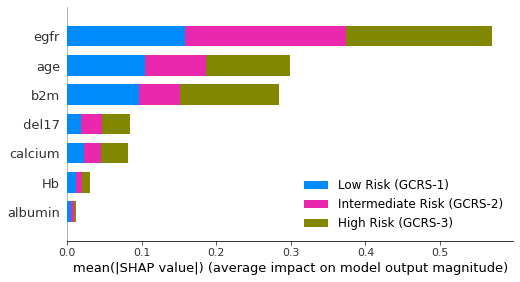

In [ ]:
shap.summary_plot([shap_values[1][0],shap_values[0][0],shap_values[2][0]],features=X, feature_names=['b2m', 'age', 'albumin', 'calcium', 'Hb', 'egfr',' del17'], class_names=['Low Risk (GCRS-1)', 'Intermediate Risk (GCRS-2)', 'High Risk (GCRS-3)'],class_inds=[0,1,2],show=False)
plt.savefig('AIIIMS_shap_features_combined.pdf', dpi=600, bbox_inches='tight')

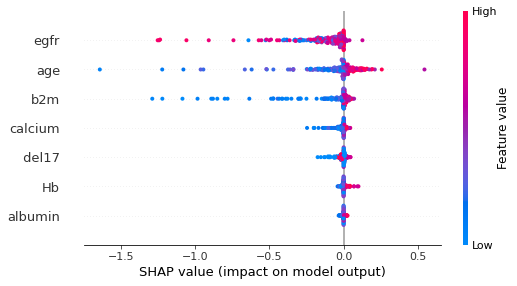

In [ ]:
shap.summary_plot(shap_values[1][0],features=X, feature_names=['b2m', 'age', 'albumin', 'calcium', 'Hb', 'egfr',' del17'],show=False)
#plt.savefig('AIIIMS_shap_features_GCRS1.pdf', dpi=600, bbox_inches='tight')

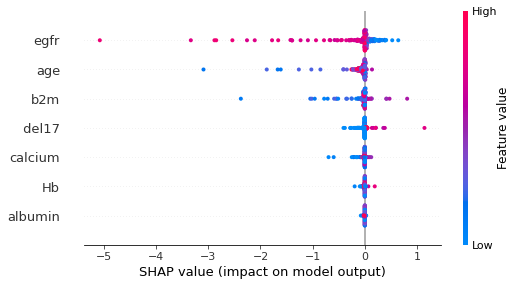

In [ ]:
shap.summary_plot(shap_values[0][0],features=X, feature_names=['b2m', 'age', 'albumin', 'calcium', 'Hb', 'egfr',' del17'], show=False)
#plt.savefig('AIIIMS_shap_features_GCRS2.pdf', dpi=600, bbox_inches='tight')

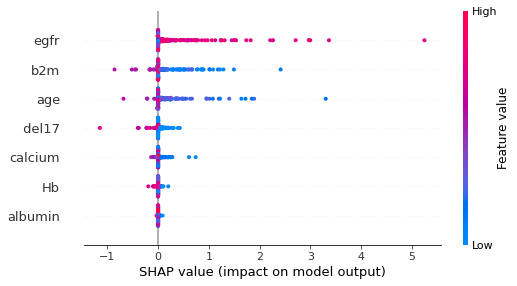

In [ ]:
shap.summary_plot(shap_values[2][0],features=X, feature_names=['b2m', 'age', 'albumin', 'calcium', 'Hb', 'egfr',' del17'], show=False)
#plt.savefig('AIIIMS_shap_features_GCRS3.pdf', dpi=600, bbox_inches='tight')

In [ ]:
shap_values[0][1].shape

(384, 384)

In [ ]:
import cv2

shap0 = cv2.resize(shap_values[0][1],(300,300),
               interpolation = cv2.INTER_NEAREST).reshape(1,300,300,1)
shap1 = cv2.resize(shap_values[1][1],(300,300),
               interpolation = cv2.INTER_NEAREST).reshape(1,300,300,1)
shap2 = cv2.resize(shap_values[2][1],(300,300),
               interpolation = cv2.INTER_NEAREST).reshape(1,300,300,1)
A = cv2.resize( A_.todense(),(300,300),
               interpolation = cv2.INTER_NEAREST).reshape(1,300,300,1)

In [ ]:
import matplotlib.pyplot as plt

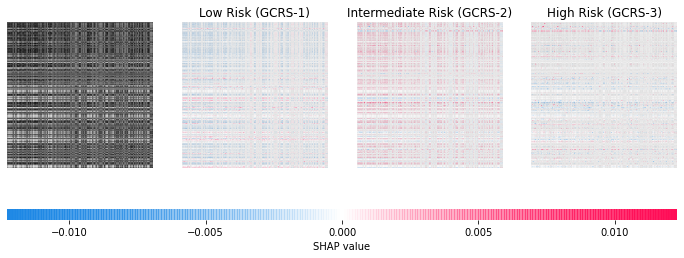

In [ ]:
shap.image_plot([shap1,shap0,shap2], A, labels = ['Low Risk (GCRS-1)', 'Intermediate Risk (GCRS-2)', 'High Risk (GCRS-3)'], show=False)
plt.savefig('AIIMS_ADJ_shap_plot.pdf', dpi=600, bbox_inches='tight')

In [ ]:
import seaborn as sns

In [ ]:
chk = shap_values[0][1].copy()
pats_0 = np.mean(chk,axis=0).argsort()[-20:]

In [ ]:
chk = shap_values[1][1].copy()
pats_1 = np.mean(chk,axis=0).argsort()[-20:]

In [ ]:
chk = shap_values[2][1].copy()
pats_2 = np.mean(chk,axis=0).argsort()[-20:]

In [ ]:

#data_t = pd.read_csv('../MRS_traindata_AIIMS_new2.csv')
data_up =  pd.read_csv('/content/AIIMS_CAdata_groups.csv')
data_up = np.array(data_up)


albumin = data_up[0 :, 3].astype(float)
b2m = data_up[0:, 4].astype(float)
#b2m = b2m * 10
Hb = data_up[0:, 7].astype(float)
calcium = data_up[0:, 9].astype(float)
egfr = data_up[0:, 23].astype(float)

age = data_up[0:, 1].astype(int)
del17 = data_up[0:,32].astype(int)

os = data_up[0:,17].astype(float)
os_event = data_up[0:, 16].astype(int)
pfs = data_up[0:, 13].astype(float)
pfs_event =  data_up[0:, 12].astype(int)


data_matrix=np.stack((b2m, age, albumin, calcium, Hb, egfr, del17, os, os_event, pfs, pfs_event), axis = 1)

In [ ]:
feat_0 = data_matrix[pats_0]
feat_1 = data_matrix[pats_1]
feat_2 = data_matrix[pats_2]


NameError: ignored

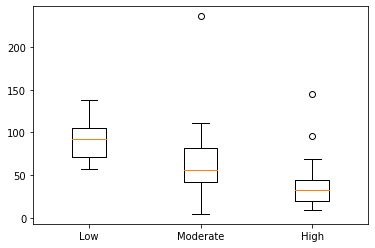

In [ ]:
plt.boxplot([feat_1[:,5],feat_0[:,5],feat_2[:,5]],labels=['Low','Moderate','High'])
plt.show()

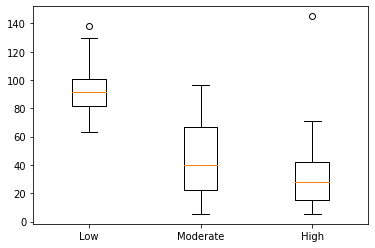

In [ ]:
plt.boxplot([feat_1[:,5],feat_0[:,5],feat_2[:,5]],labels=['Low','Moderate','High'])
plt.show()

In [ ]:
from scipy.stats import ttest_ind, wilcoxon, ranksums, kruskal

In [ ]:
wilcoxon(feat_1[:,5],feat_0[:,5])        # Low vs Moderate

WilcoxonResult(statistic=41.0, pvalue=0.016880932087628427)

In [ ]:
wilcoxon(feat_2[:,5],feat_0[:,5])        # High vs Moderate

WilcoxonResult(statistic=42.0, pvalue=0.018674874007415902)

In [ ]:
wilcoxon(feat_2[:,5],feat_1[:,5])        # High vs Low

WilcoxonResult(statistic=6.0, pvalue=0.00021907963048002185)

In [ ]:
y.shape

(76472,)

In [ ]:
feat_0 = data_matrix[np.where(y == 0)[0]]
feat_1 = data_matrix[np.where(y == 1)[0]]
feat_2 = data_matrix[np.where(y == 2)[0]]


In [ ]:
np.where(y == 0), np.where(y == 1), np.where(y == 2)

((array([  0,   3,   4,   6,   8,   9,  10,  11,  13,  14,  15,  17,  18,
          19,  21,  22,  23,  24,  25,  26,  27,  28,  30,  32,  33,  34,
          35,  36,  37,  39,  41,  42,  43,  44,  45,  46,  47,  48,  49,
          50,  53,  55,  56,  57,  60,  61,  62,  66,  67,  71,  72,  73,
          74,  75,  76,  79,  80,  81,  82,  84,  85,  88,  90,  91,  92,
          94,  95,  96,  97,  99, 100, 103, 105, 111, 112, 113, 115, 118,
         120, 122, 124, 125, 126, 127, 130, 132, 133, 134, 137, 138, 139,
         142, 144, 146, 148, 149, 151, 152, 153, 154, 155, 157, 158, 161,
         162, 163, 164, 165, 170, 174, 176, 178, 182, 185, 188, 190, 191,
         193, 196, 197, 201, 203, 205, 209, 210, 211, 212, 213, 214, 215,
         216, 218, 219, 220, 222, 226, 228, 229, 230, 237, 238, 239, 243,
         246, 249, 251, 253, 255, 258, 259, 261, 263, 264, 272, 273, 276,
         279, 282, 283, 284, 287, 289, 292, 294, 295, 300, 305, 307, 310,
         313, 318, 322, 325, 326, 327,

In [ ]:
preds = np.array(lab_pred)

In [ ]:
feats_0 = data_matrix[np.where(preds == 0 )[0]]
feats_1 = data_matrix[np.where(preds == 1 )[0]]
feats_2 = data_matrix[np.where(preds == 2 )[0]]

In [ ]:
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.)
sns.set_style('whitegrid', {'axes.facecolor':'white', 'grid.color':'lightgrey', 'axes.edgecolor':'white'})
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'lightgrey',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': False,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False}

In [ ]:
my_pal = {0: "g", 1: "b", 2:"r"}

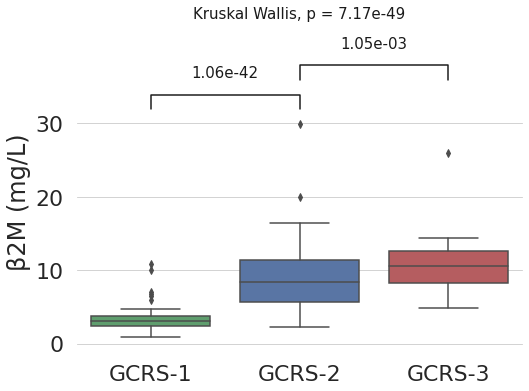

In [ ]:
# b2m
f = 0
p1 = ranksums(feats_1[:,f], feats_0[:,f]).pvalue
p2 = ranksums(feats_0[:,f], feats_2[:,f]).pvalue
p = kruskal(feats_1[:,f], feats_0[:,f], feats_2[:,f]).pvalue
sns.boxplot(data=[feats_1[:,f],feats_0[:,f],feats_2[:,f]], palette=my_pal).set(ylabel = 'β2M (mg/L)', xticklabels=['GCRS-1', 'GCRS-2', 'GCRS-3'])
y, h, col = data_matrix[:,f].max() + 2, 2, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((0+1)*.5, y+h+2, str('%.2e' % p1), ha='center', va='bottom', color=col, fontsize=15)

plt.plot([1, 1, 2, 2], [y+4, y+h+4, y+h+4, y+4], lw=1.5, c=col)
plt.text((1+2)*.5, y+h+6, str('%.2e' % p2), ha='center', va='bottom', color=col, fontsize=15)

plt.text(1, y+h+10, "Kruskal Wallis, p = "+str('%.2e' % p), ha='center', va='bottom', color=col, fontsize=15)
plt.savefig('/content/aiims_box_b2m.pdf',format='pdf',dpi=600, facecolor='white')
plt.show()

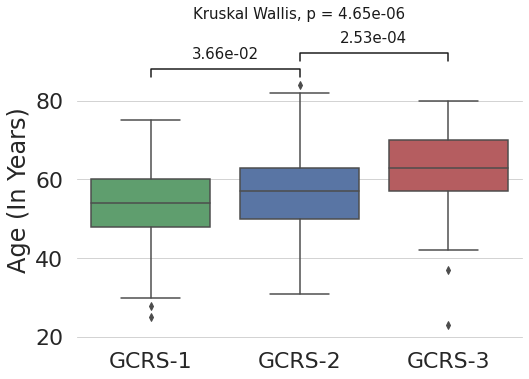

In [ ]:
# age
f = 1
p1 = ranksums(feats_1[:,f], feats_0[:,f]).pvalue
p2 = ranksums(feats_0[:,f], feats_2[:,f]).pvalue
p = kruskal(feats_1[:,f], feats_0[:,f], feats_2[:,f]).pvalue
sns.boxplot(data=[feats_1[:,f],feats_0[:,f],feats_2[:,f]], palette=my_pal).set(ylabel = 'Age (In Years)', xticklabels=['GCRS-1', 'GCRS-2', 'GCRS-3'])
y, h, col = data_matrix[:,f].max() + 2, 2, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((0+1)*.5, y+h+2, str('%.2e' % p1), ha='center', va='bottom', color=col, fontsize=15)

plt.plot([1, 1, 2, 2], [y+4, y+h+4, y+h+4, y+4], lw=1.5, c=col)
plt.text((1+2)*.5, y+h+6, str('%.2e' % p2), ha='center', va='bottom', color=col, fontsize=15)

plt.text(1, y+h+12, "Kruskal Wallis, p = "+str('%.2e' % p), ha='center', va='bottom', color=col, fontsize=15)
plt.savefig('/content/aiims_box_age.pdf',format='pdf',dpi=600, bbox_inches='tight', facecolor='white')
plt.show()

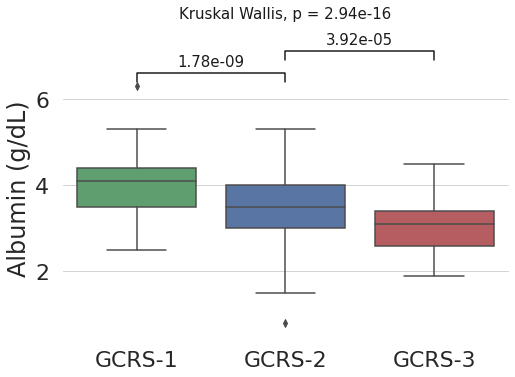

In [ ]:
# albumin
f = 2
p1 = ranksums(feats_1[:,f], feats_0[:,f]).pvalue
p2 = ranksums(feats_0[:,f], feats_2[:,f]).pvalue
p = kruskal(feats_1[:,f], feats_0[:,f], feats_2[:,f]).pvalue
sns.boxplot(data=[feats_1[:,f],feats_0[:,f],feats_2[:,f]], palette=my_pal).set(ylabel = 'Albumin (g/dL)', xticklabels=['GCRS-1', 'GCRS-2', 'GCRS-3'])
y, h, col = data_matrix[:,f].max() + 0.1, 0.2, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((0+1)*.5, y+h+0.1, str('%.2e' % p1), ha='center', va='bottom', color=col, fontsize=15)

plt.plot([1, 1, 2, 2], [y+0.5, y+h+0.5, y+h+0.5, y+0.5], lw=1.5, c=col)
plt.text((1+2)*.5, y+h+0.6, str('%.2e' % p2), ha='center', va='bottom', color=col, fontsize=15)

plt.text(1, y+h+1.2, "Kruskal Wallis, p = "+str('%.2e' % p), ha='center', va='bottom', color=col, fontsize=15)
plt.savefig('/content/aiims_box_albumin.pdf',format='pdf',dpi=600, bbox_inches='tight', facecolor='white')
plt.show()

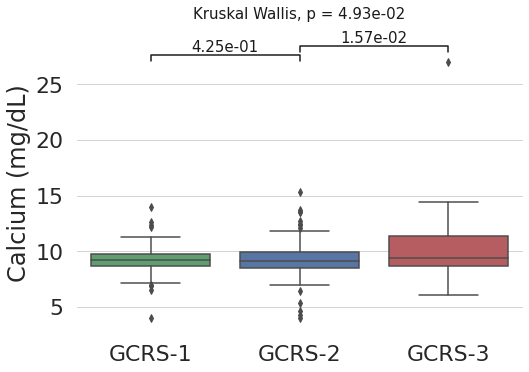

In [ ]:
# calcium
f = 3
p1 = ranksums(feats_1[:,f], feats_0[:,f]).pvalue
p2 = ranksums(feats_0[:,f], feats_2[:,f]).pvalue
p = kruskal(feats_1[:,f], feats_0[:,f], feats_2[:,f]).pvalue
sns.boxplot(data=[feats_1[:,f],feats_0[:,f],feats_2[:,f]], palette=my_pal).set(ylabel = 'Calcium (mg/dL)', xticklabels=['GCRS-1', 'GCRS-2', 'GCRS-3'])
y, h, col = data_matrix[:,f].max() + 0.1, 0.5, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((0+1)*.5, y+h+0.1, str('%.2e' % p1), ha='center', va='bottom', color=col, fontsize=15)

plt.plot([1, 1, 2, 2], [y+0.8, y+h+0.8, y+h+0.8, y+0.8], lw=1.5, c=col)
plt.text((1+2)*.5, y+h+0.9, str('%.2e' % p2), ha='center', va='bottom', color=col, fontsize=15)

plt.text(1, y+h+3, "Kruskal Wallis, p = "+str('%.2e' % p), ha='center', va='bottom', color=col, fontsize=15)
plt.savefig('/content/aiims_box_calcium.pdf',format='pdf',dpi=600, bbox_inches='tight', facecolor='white')
plt.show()

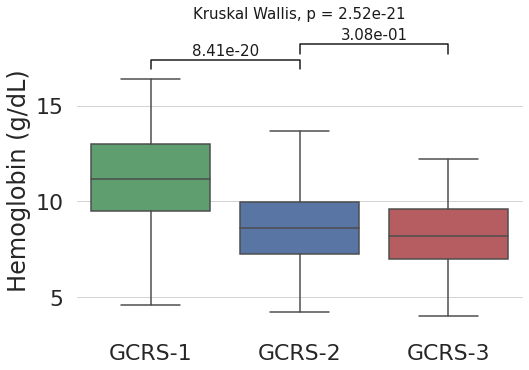

In [ ]:
# Hb
f = 4
p1 = ranksums(feats_1[:,f], feats_0[:,f]).pvalue
p2 = ranksums(feats_0[:,f], feats_2[:,f]).pvalue
p = kruskal(feats_1[:,f], feats_0[:,f], feats_2[:,f]).pvalue
sns.boxplot(data=[feats_1[:,f],feats_0[:,f],feats_2[:,f]], palette=my_pal).set(ylabel = 'Hemoglobin (g/dL)', xticklabels=['GCRS-1', 'GCRS-2', 'GCRS-3'])
y, h, col = data_matrix[:,f].max() + 0.5, 0.5, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((0+1)*.5, y+h+0.1, str('%.2e' % p1), ha='center', va='bottom', color=col, fontsize=15)

plt.plot([1, 1, 2, 2], [y+0.8, y+h+0.8, y+h+0.8, y+0.8], lw=1.5, c=col)
plt.text((1+2)*.5, y+h+0.9, str('%.2e' % p2), ha='center', va='bottom', color=col, fontsize=15)

plt.text(1, y+h+2, "Kruskal Wallis, p = "+str('%.2e' % p), ha='center', va='bottom', color=col, fontsize=15)
plt.savefig('/content/aiims_box_Hb.pdf',format='pdf',dpi=600, bbox_inches='tight', facecolor='white')
plt.show()

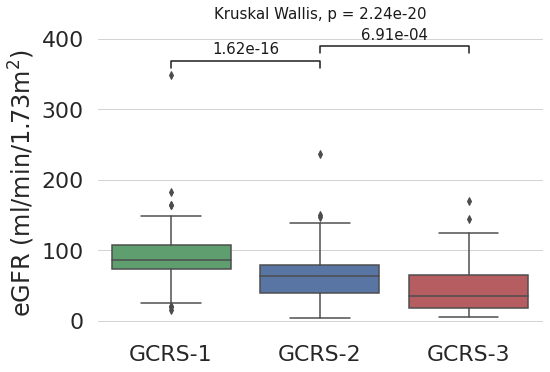

In [ ]:
# eGFR
f = 5
p1 = ranksums(feats_1[:,f], feats_0[:,f]).pvalue
p2 = ranksums(feats_0[:,f], feats_2[:,f]).pvalue
p = kruskal(feats_1[:,f], feats_0[:,f], feats_2[:,f]).pvalue
sns.boxplot(data=[feats_1[:,f],feats_0[:,f],feats_2[:,f]], palette=my_pal).set(ylabel = 'eGFR (ml/min/1.73m$^2$)', xticklabels=['GCRS-1', 'GCRS-2', 'GCRS-3'])
y, h, col = data_matrix[:,f].max() + 10, 10, 'k'
plt.plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((0+1)*.5, y+h+5, str('%.2e' % p1), ha='center', va='bottom', color=col, fontsize=15)

plt.plot([1, 1, 2, 2], [y+20, y+h+20, y+h+20, y+20], lw=1.5, c=col)
plt.text((1+2)*.5, y+h+25, str('%.2e' % p2), ha='center', va='bottom', color=col, fontsize=15)

plt.text(1, y+h+55, "Kruskal Wallis, p = "+str('%.2e' % p), ha='center', va='bottom', color=col, fontsize=15)
plt.savefig('/content/aiims_box_eGFR.pdf',format='pdf',dpi=600, bbox_inches='tight', facecolor='white')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
preds = np.array(lab_pred)

In [ ]:
cm = confusion_matrix(y, preds)
cm

array([[194,   0,   4],
       [  0, 132,   0],
       [  1,   0,  53]])

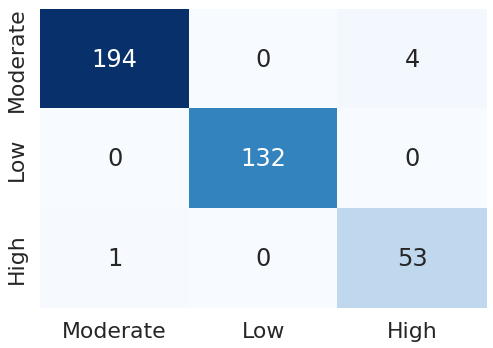

In [ ]:
cmd = pd.DataFrame(cm,['Moderate', 'Low', 'High'],['Moderate', 'Low', 'High'])
sns.heatmap(cmd, annot=True,fmt='',cmap="Blues",cbar=False)
plt.savefig('/content/aiims_conf.pdf',format='pdf',dpi=600, bbox_inches='tight', facecolor='white')
plt.show()